In [ ]:
import numpy as np
import pandas as pd

In [ ]:
dataset=pd.read_csv('/content/titanic_train.csv')


In [ ]:
dataset.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [ ]:
dataset.shape

(850, 15)

In [ ]:
dataset['survived'].value_counts()

,count
survived,
0,537
1,313


In [ ]:
dataset.isnull().sum()

,0
passenger_id,0
pclass,0
name,0
sex,0
age,174
sibsp,0
parch,0
ticket,0
fare,1
cabin,659


In [ ]:
#dropping some columns
dataset=dataset.drop(columns=['cabin','boat','body','home.dest','embarked'],axis=1)

In [ ]:
dataset.isnull().sum()

,0
passenger_id,0
pclass,0
name,0
sex,0
age,174
sibsp,0
parch,0
ticket,0
fare,1
survived,0


In [ ]:
#handling missing values
dataset['age'].fillna(dataset['age'].mean(),inplace = True)
dataset['fare'].fillna(dataset['fare'].mean(),inplace = True)

<ipython-input-51-59492932>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['age'].fillna(dataset['age'].mean(),inplace = True)
<ipython-input-51-59492932>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [ ]:
dataset.isnull().sum()

,0
passenger_id,0
pclass,0
name,0
sex,0
age,0
sibsp,0
parch,0
ticket,0
fare,0
survived,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set()

<Axes: xlabel='sex', ylabel='count'>

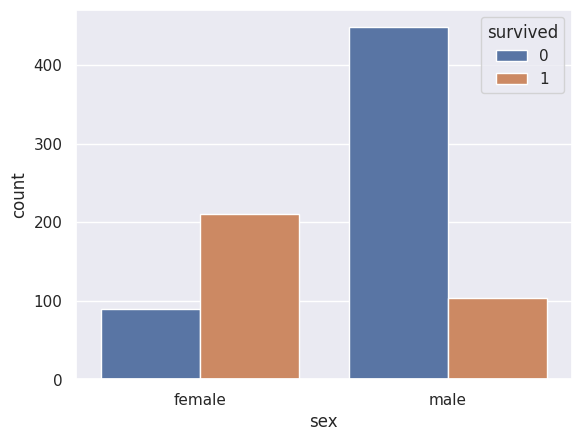

In [ ]:
sns.countplot(x='sex',hue='survived', data=dataset)

In [ ]:
#label encoding
dataset.replace({'sex':{'male': 0 , 'female': 1}},inplace=True)

<ipython-input-56-4106110655>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'sex':{'male': 0 , 'female': 1}},inplace=True)


In [ ]:
dataset['sex'].value_counts()

,count
sex,
0,551
1,299


In [ ]:
dataset.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,survived
0,1216,3,"Smyth, Miss. Julia",1,29.519847,0,0,335432,7.7333,1
1,699,3,"Cacic, Mr. Luka",0,38.000000,0,0,315089,8.6625,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",1,30.000000,1,1,345773,24.1500,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",1,54.000000,1,3,29105,23.0000,1
4,576,2,"Veal, Mr. James",0,40.000000,0,0,28221,13.0000,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
X= dataset.drop(columns=['name','passenger_id','ticket','survived'],axis=1)   #features

In [ ]:
Y= dataset['survived']   #target

In [ ]:
print(X)

     pclass  sex        age  sibsp  parch     fare
0         3    1  29.519847      0      0   7.7333
1         3    0  38.000000      0      0   8.6625
2         3    1  30.000000      1      1  24.1500
3         2    1  54.000000      1      3  23.0000
4         2    0  40.000000      0      0  13.0000
..      ...  ...        ...    ...    ...      ...
845       1    0  55.000000      0      0  50.0000
846       1    0  58.000000      0      0  29.7000
847       2    1  24.000000      1      0  26.0000
848       3    1   3.000000      1      1  13.7750
849       2    0  52.000000      0      0  13.0000

[850 rows x 6 columns]


In [ ]:
print(Y)

0      1
1      0
2      0
3      1
4      0
      ..
845    0
846    0
847    1
848    0
849    0
Name: survived, Length: 850, dtype: int64


In [ ]:
X_train , X_test, Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
#model training
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train )

LogisticRegression()

In [ ]:
X_train_prediction=model.predict(X_train)

In [ ]:
print(X_train_prediction)

[1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1
 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1
 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0
 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1
 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 

In [ ]:
training_acc=accuracy_score(Y_train,X_train_prediction)

In [ ]:
print("Accuracy of training data: ",training_acc )


Accuracy of training data:  0.8


In [ ]:
X_test_prediction=model.predict(X_test)

In [ ]:
print(X_test_prediction)

[0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0
 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0
 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1
 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1]


In [ ]:
test_acc=accuracy_score(Y_test, X_test_prediction )

In [ ]:
print("Accuracy of test data : ",test_acc)

Accuracy of test data :  0.7647058823529411


In [ ]:
#prediction system
#0->male
#1->female
# sample input : [pclass, sex, age, sibsp, parch, fare]
input_data = (3, 1, 22.0, 1, 0, 7.25)

input_array = np.asarray(input_data).reshape(1, -1)

prediction = model.predict(input_array)

if prediction[0] == 0:
    print("This passenger would not have survived \n ")
else:
    print("This passenger would have survived  \n")


This passenger would have survived  



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
#prediction system
#0->male
#1->female
# sample input : [pclass, sex, age, sibsp, parch, fare]
input_data = (3, 0, 38.0, 0, 0,	8.6625)

input_array = np.asarray(input_data).reshape(1, -1)

prediction = model.predict(input_array)

if prediction[0] == 0:
    print("This passenger would not have survived \n ")
else:
    print("This passenger would have survived  \n")


This passenger would not have survived 
 


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
